In [252]:
%pip install numpy pandas matplotlib scipy seaborn scikit-learn tensorflow keras plotly 
%pip install kagglehub
%pip install plotnine

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [253]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

**Attributes**
*People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

*Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

*Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

*Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

*Target*
- Need to perform clustering to summarize customer segments.

In [254]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/customer-personality-analysis")

print("Path to dataset files:", path)

Path to dataset files: /Users/shreyavats/.cache/kagglehub/datasets/whenamancodes/customer-personality-analysis/versions/1


In [255]:
#Loading the dataset
data = pd.read_csv(path + "/marketing_campaign.csv", sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


DATA CLEANING

In [256]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*From the above output, we can conclude and note that:*

There are missing values in income

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

There are some categorical features in our data frame; as there are some features in dtype: object. So we will need to encode them into numeric forms later.

First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [257]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))
data.describe()

The total number of data-points after removing the rows with missing values are: 2216


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [258]:
# missing values
data.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [259]:
#drop columns that are not required for analysis
data = data.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'])
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


In [260]:
data.describe().round(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,1968.82,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,27.03,...,2.67,5.80,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15
std,11.99,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,41.07,...,2.93,3.25,2.43,0.26,0.26,0.26,0.24,0.12,0.10,0.36
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,...,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1970.00,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,8.00,...,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1977.00,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,...,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,...,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [261]:
# Univariate Analysis for Categorical Features 
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs

def plot_categorical(series):
    data = pd.DataFrame({series.name: series})

    plot = (ggplot(data, aes(x=series.name)) +
            geom_bar(fill='skyblue') +
            theme_minimal() +
            labs(title=f'Bar Plot of {series.name}', x=series.name, y='Count'))
    
    return plot

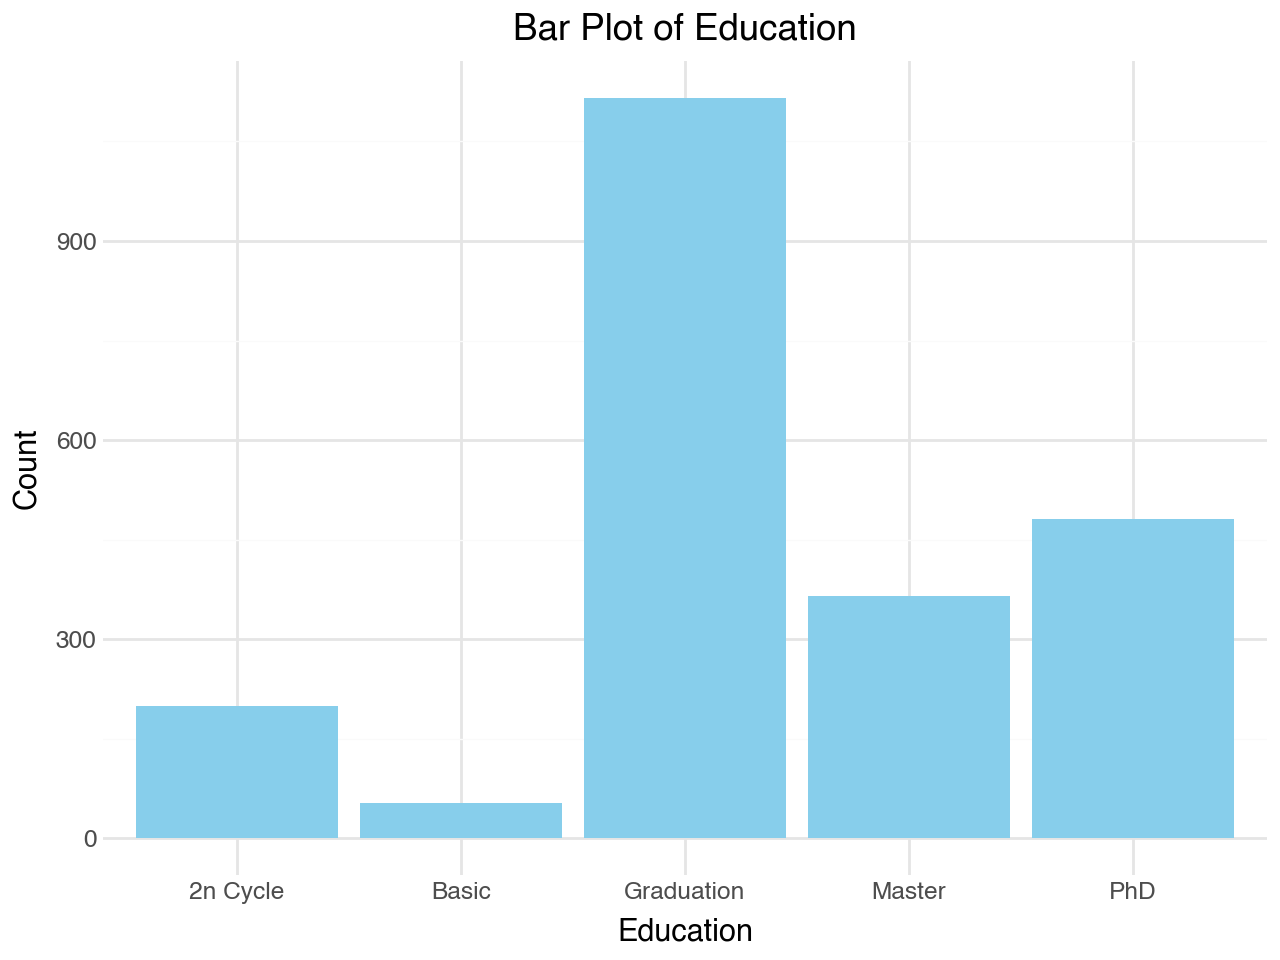

In [241]:
plot_categorical(data['Education'])

The Education column shows most individuals have a Graduation degree (1127), followed by PhD (486) and Master's (370). A smaller number have 2nd Cycle (203) or Basic education (54).

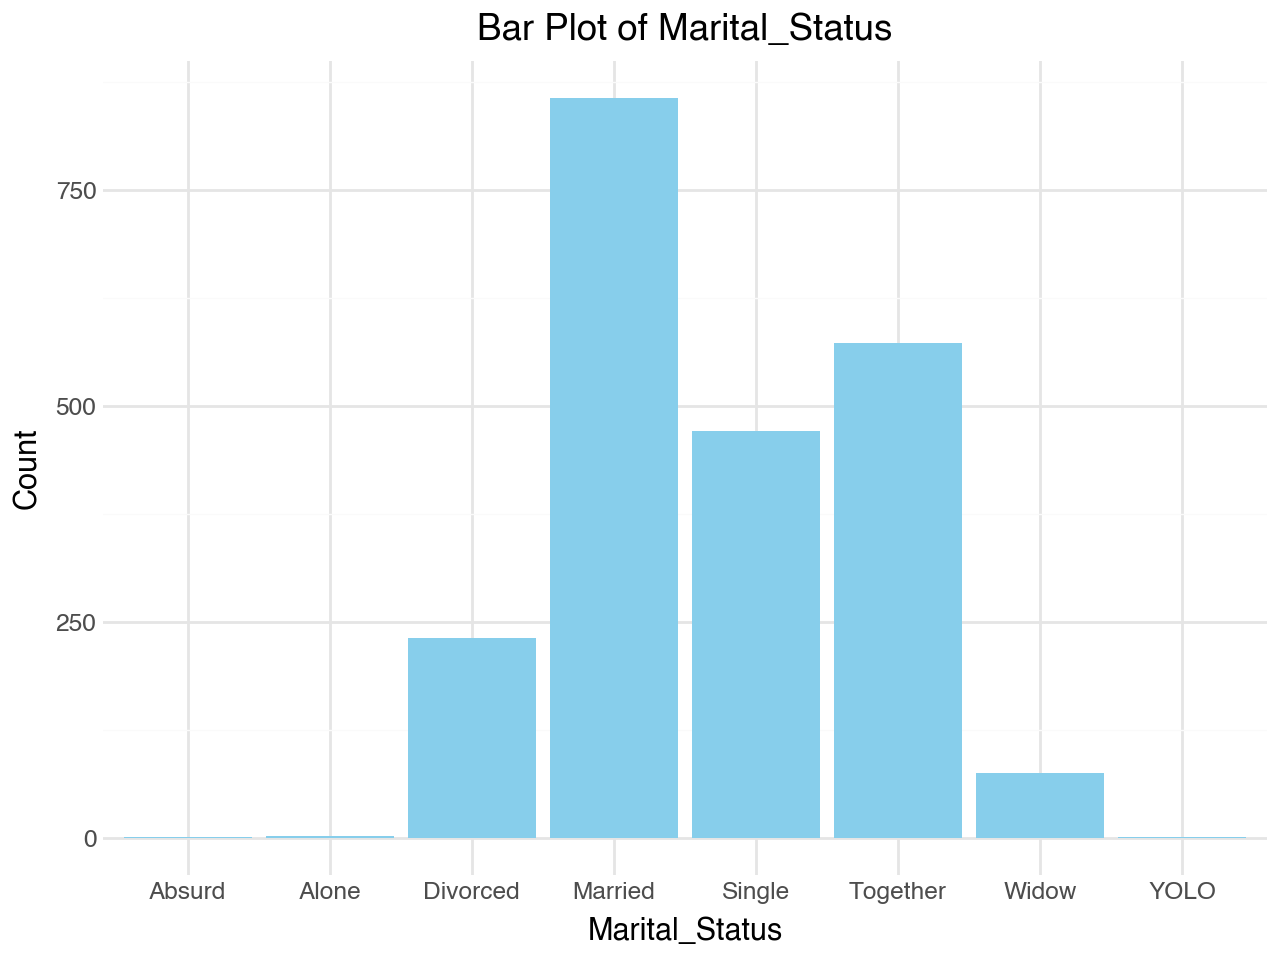

In [242]:
plot_categorical(data['Marital_Status'])

The Marital_Status column indicates most individuals are either Married (864) or Together (580), followed by Single (480) and Divorced (232). Smaller groups include Widow (77), Alone (3), Absurd (2), and YOLO (2).

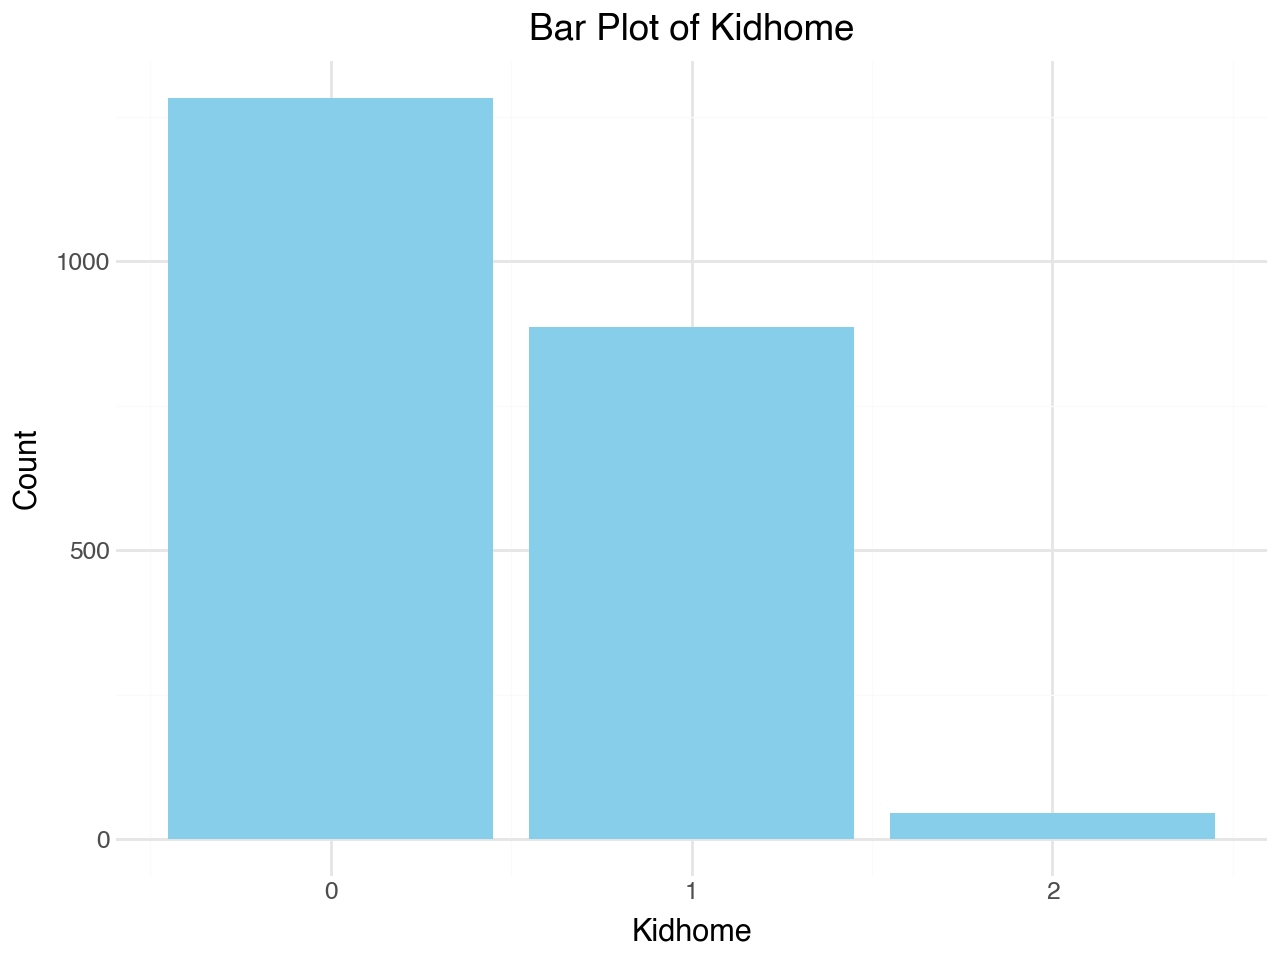

In [243]:
plot_categorical(data['Kidhome'])

The Kidhome column shows that most individuals have no children at home (0: 1293), while a significant number have 1 child (899), and only a small portion have 2 children (48).

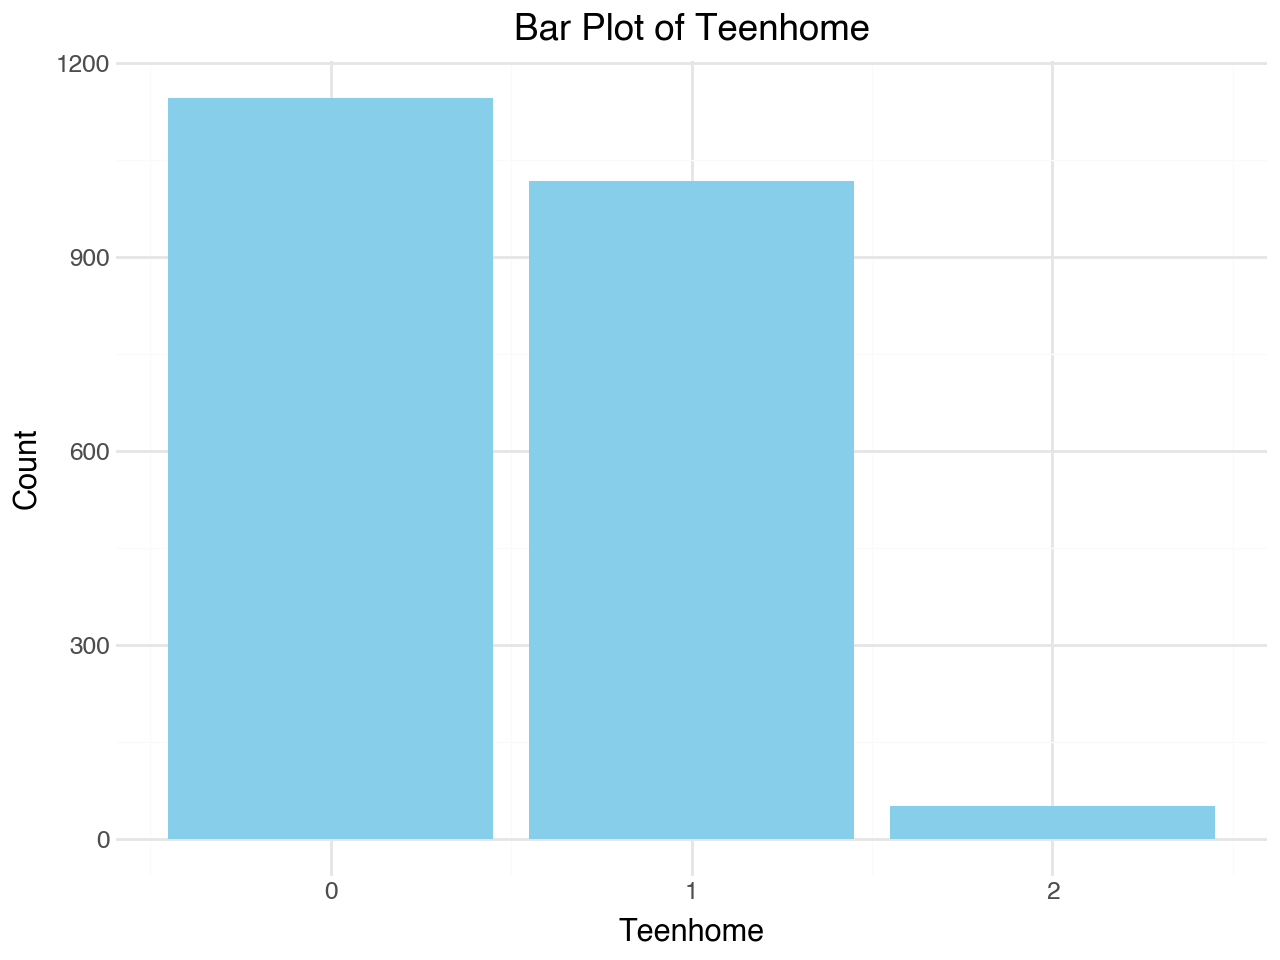

In [244]:
plot_categorical(data['Teenhome'])

The Teenhome column reveals that the majority of individuals have no teenagers at home (0: 1158), followed by those with 1 teenager (1030), and a small number with 2 teenagers (52).

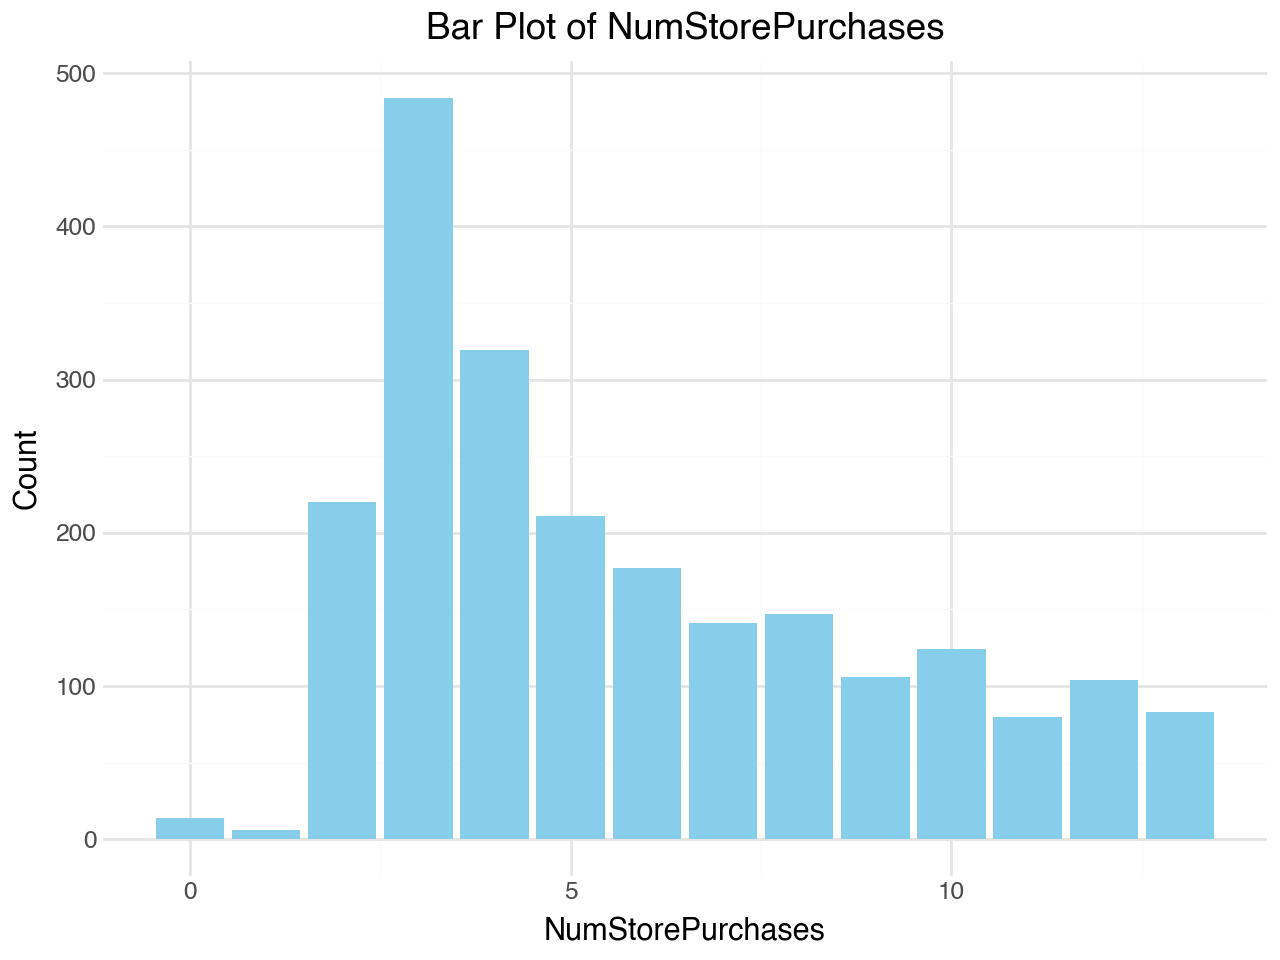

In [245]:
plot_categorical(data['NumStorePurchases'])

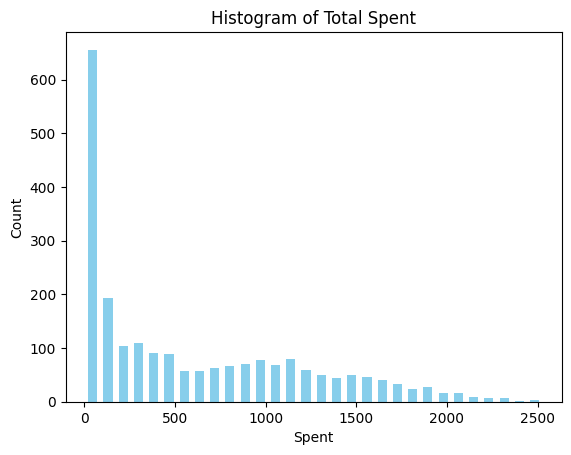

In [262]:
import matplotlib.pyplot as plt
data['Spent'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                 data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])

plt.hist(data['Spent'], bins=30, color='skyblue', rwidth=0.6)
plt.title("Histogram of Total Spent")
plt.xlabel("Spent")
plt.ylabel("Count")
plt.show()


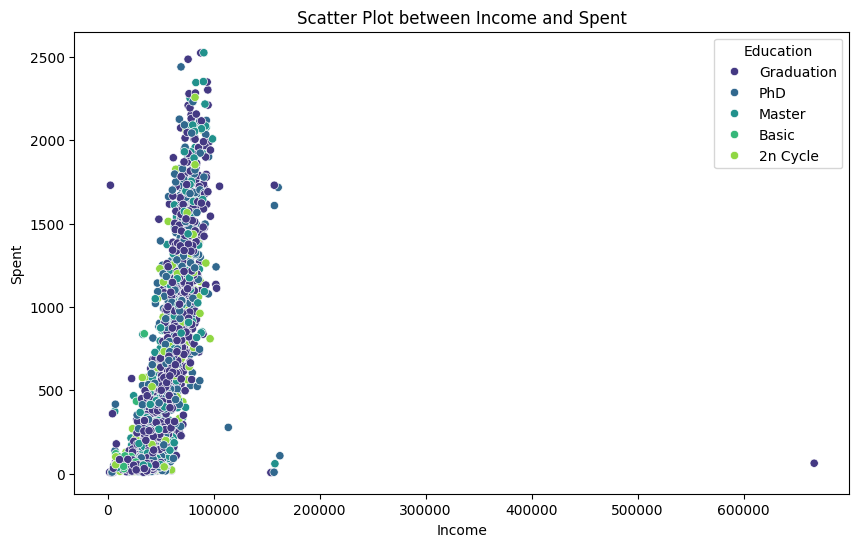

In [263]:
#Bivariate Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Income", y="Spent", hue="Education", palette="viridis")
plt.title("Scatter Plot between Income and Spent")
plt.show()  

In [264]:
# convert categorical variables to numerical for correlation analysis
data_encoded = data.copy()

# mapping dictionaries
edu_map = {
    'Basic': 1, 
    '2n Cycle': 2, 
    'Graduation': 3,
    'Master': 4, 
    'PhD': 5
}
marital_map = {
    'Single': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6,
    'YOLO': 7,
    'Together': 8   
}

# map categorical values
data_encoded['Education'] = data_encoded['Education'].map(edu_map)
data_encoded['Marital_Status'] = data_encoded['Marital_Status'].map(marital_map)

data_encoded

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,1957,3,1,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,3,1,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,3,8,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,3,8,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,5,2,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,3,2,61223.0,0,1,46,709,43,182,...,4,5,0,0,0,0,0,0,0,1341
2236,1946,5,8,64014.0,2,1,56,406,0,30,...,5,7,0,0,0,1,0,0,0,444
2237,1981,3,3,56981.0,0,0,91,908,48,217,...,13,6,0,1,0,0,0,0,0,1241
2238,1956,4,8,69245.0,0,1,8,428,30,214,...,10,3,0,0,0,0,0,0,0,843


In [249]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(data_encoded),
    columns=data_encoded.columns
)
normalized_data.describe().round(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,0.74,0.61,0.36,0.08,0.22,0.25,0.50,0.20,0.13,0.10,...,0.45,0.27,0.07,0.07,0.07,0.06,0.01,0.01,0.15,0.24
std,0.12,0.25,0.39,0.04,0.27,0.27,0.29,0.23,0.20,0.13,...,0.25,0.12,0.26,0.26,0.26,0.24,0.12,0.10,0.36,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.64,0.50,0.14,0.05,0.00,0.00,0.24,0.02,0.01,0.01,...,0.23,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
50%,0.75,0.50,0.14,0.07,0.00,0.00,0.49,0.12,0.04,0.04,...,0.38,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16
75%,0.82,0.75,1.00,0.10,0.50,0.50,0.75,0.34,0.17,0.13,...,0.62,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


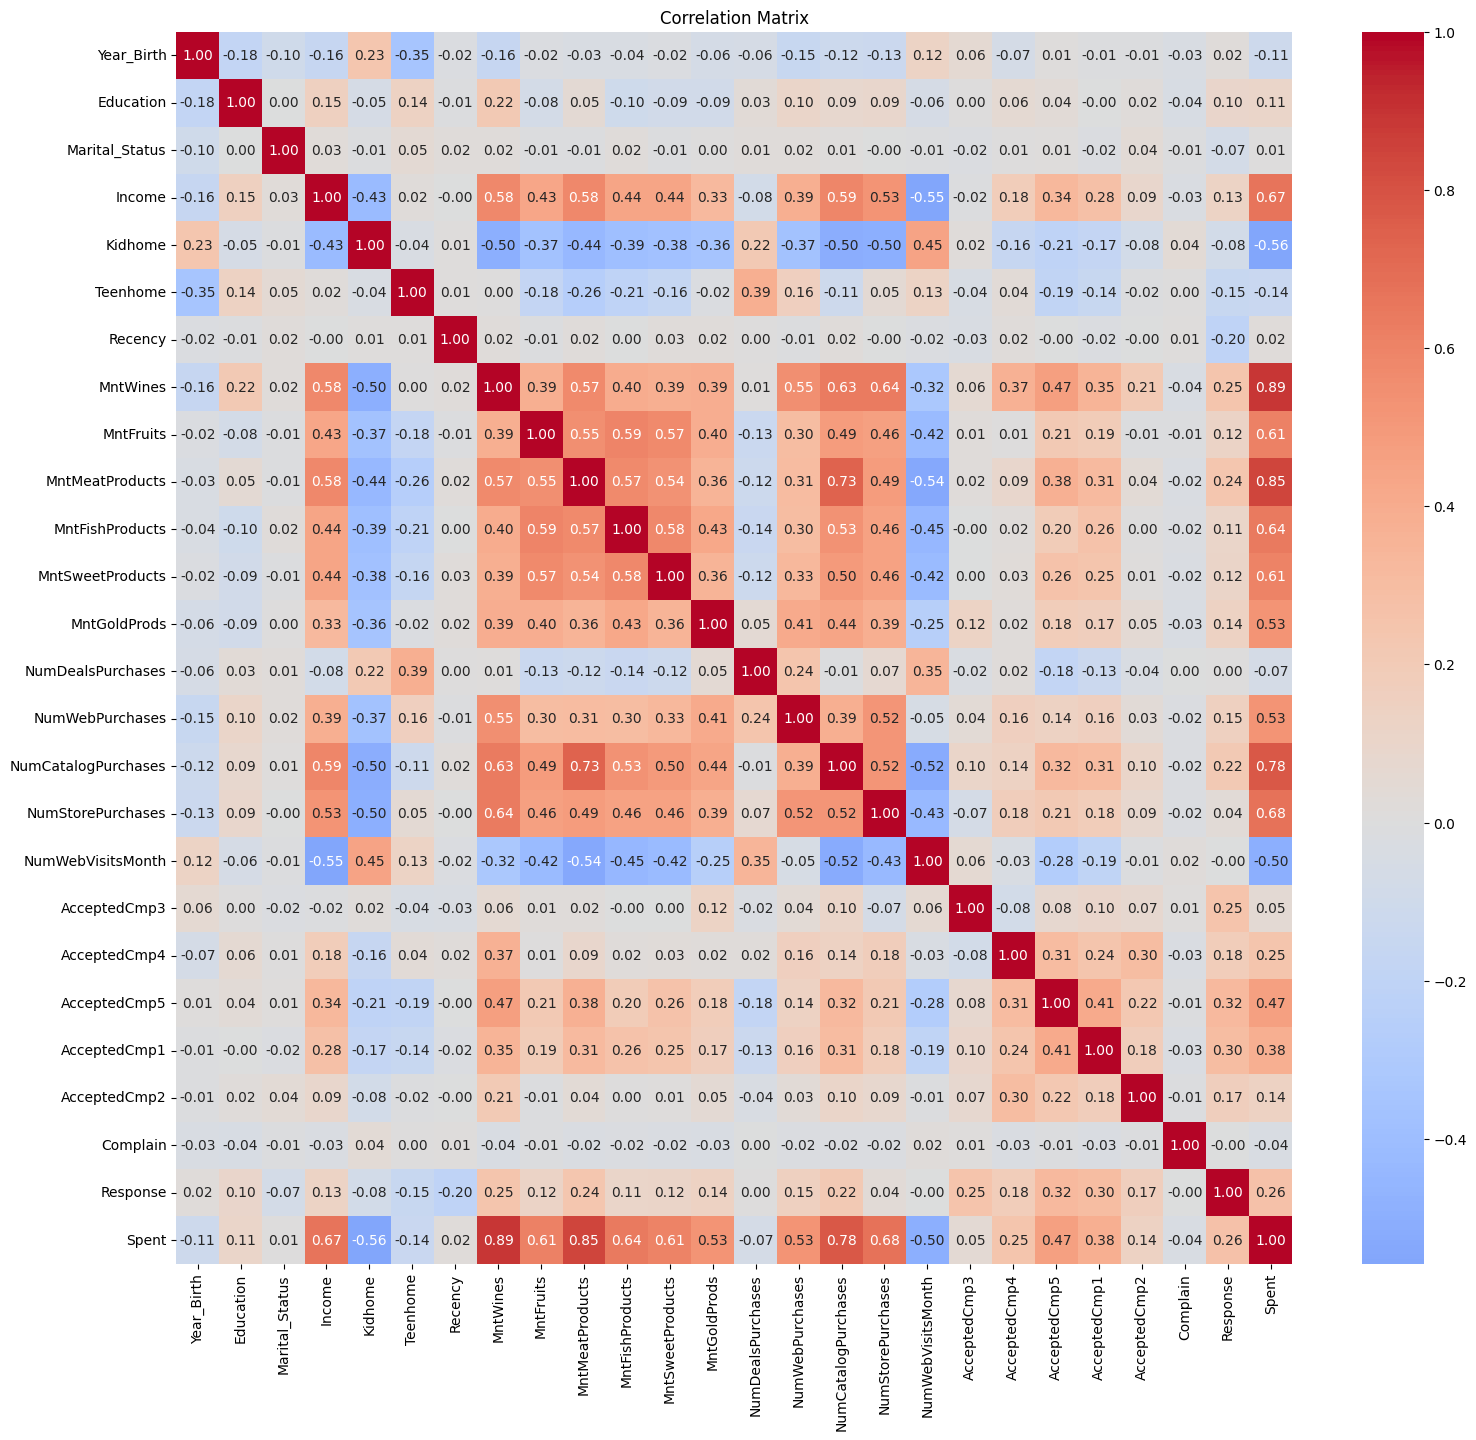

In [250]:
#correlation matrix
# Select only numeric columns
numeric_data = normalized_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix Interpretation**

Strong positive correlations among spending variables, moderate links with income, and meaningful negative correlations with recency. This means the data has real patterns, not random noise.

**Why is it not perfect?**
Some variables (e.g., complaints, campaign responses, education) show very weak correlations, meaning they don’t move with most other variables. That’s normal — not all features in customer data are linearly related.

**Can unsupervised learning remove uncorrelated areas?**
Yes — techniques like PCA (Principal Component Analysis) can reduce dimensionality by discarding low-variance or uninformative features. Cluster analysis (K-means, hierarchical clustering) also naturally ignores weakly related variables by grouping customers based on the strongest patterns.

**Key observations from your matrix**

Spending variables form a strong, cohesive block → great for clustering and PCA.

Income strongly drives spending → a major segmentation axis.

Recency is negatively tied to activity → useful for churn analysis.

Many demographic variables add little linear signal → may be dropped or transformed.

